In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [5]:
def initialize_centroids(X, k):
    np.random.seed(24)  
    indices = np.random.choice(X.shape[0], k, replace=False) 
    return X[indices]


In [6]:
def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  

In [7]:
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return np.argmin(distances, axis=1)  

In [8]:
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [9]:
def kmeans(X, k, max_iter=100):
    centroids = initialize_centroids(X, k)  
    
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids) 
        new_centroids = update_centroids(X, labels, k)  
        
        if np.all(centroids == new_centroids):  
            break
        
        centroids = new_centroids
    
    return centroids, labels 

In [10]:
def compute_wss(X, centroids, labels):
    return np.sum((X - centroids[labels]) ** 2)

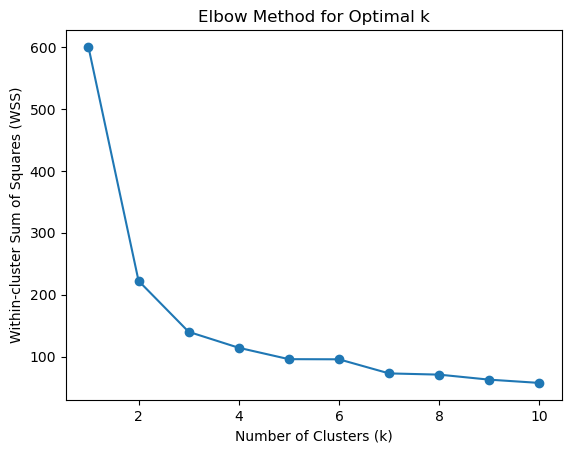

In [11]:
wss_values = []
k_values = range(1, 11)

for k in k_values:
    centroids, labels = kmeans(X, k)
    wss_values.append(compute_wss(X, centroids, labels))

plt.plot(k_values, wss_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-cluster Sum of Squares (WSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

the optimal number of clusters (elbow point) is 3.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  

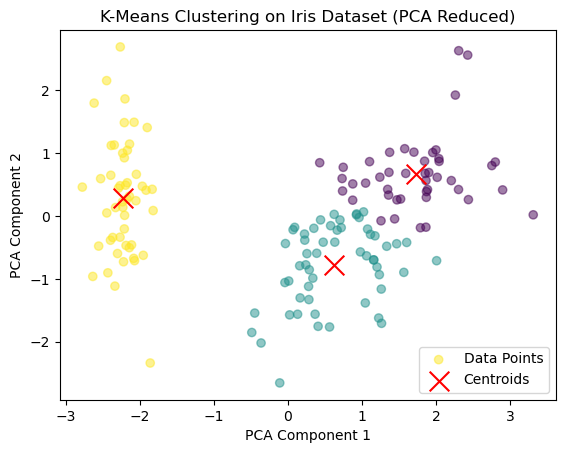

In [14]:
optimal_k = 3  
centroids, labels = kmeans(X, optimal_k)
centroids_pca = pca.transform(centroids)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5, label="Data Points")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on Iris Dataset (PCA Reduced)")
plt.legend()
plt.show()

5. Analysis and Implementation Questions:
∗ What are the final centroids of the clusters for the chosen
value of k?
∗ How does the within-cluster variance change as k increases?
∗ Does your algorithm perform well for the Iris dataset?
Why or why not?

In [15]:
print("Final centroids:\n", centroids)

Final centroids:
 [[ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


In [16]:
for k, wss in zip(k_values, wss_values):
    print(f"k={k}, WSS={wss:.2f}")

k=1, WSS=600.00
k=2, WSS=222.36
k=3, WSS=140.03
k=4, WSS=114.30
k=5, WSS=95.91
k=6, WSS=95.69
k=7, WSS=72.93
k=8, WSS=70.95
k=9, WSS=62.83
k=10, WSS=57.55


K-Means works reasonably well for the Iris dataset, especially for separating the Setosa class. However, there is some overlap between the Versicolor and Virginica classes, making it difficult for K-Means to achieve perfect clustering